# Miscellaneous examples

## Compact estimator representations

This example illustrates the use of the print_changed_only global parameter.

Setting print_changed_only to True will alternate the representation of estimators to only show the parameters that have been set to non-default values. This can be used to have more compact representations.

In [1]:
print(__doc__)

from sklearn.linear_model import LogisticRegression
from sklearn import set_config

lr = LogisticRegression(penalty='l1')
print('Default representation:')
print(lr)

set_config(print_changed_only=True)
print('\nWith changed_only option:')
print(lr)

Automatically created module for IPython interactive environment
Default representation:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

With changed_only option:
LogisticRegression(penalty='l1')


## ROC Curve with Visualization API

Scikit-learn defines a simple API for creating visualizations for machine learning. The key features of this API is to allow for quick plotting and visual adjustments without recalculation. In this example, we will demonstrate how to use the visualization API by comparing ROC curves.

In [2]:
print(__doc__)

Automatically created module for IPython interactive environment


### Load Data and Train a SVC

First, we load the wine dataset and convenrt it to a binary classification problem. Then, we train a support vector classifier on a training dataset.

In [1]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

X,y = load_wine(return_X_y=True)
y = y == 2

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

### Plotting the ROC Curve

Next, we plot the ROC curve with a single call to `sklearn.metrics.plot_roc_curve`. The returned `svc_disp` object allows us to continue using the already computed ROC curve for the SVC in future plots.

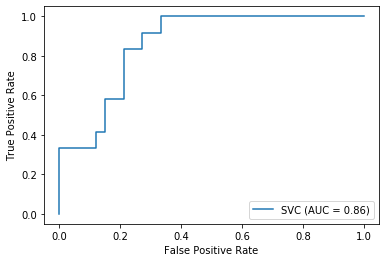

In [2]:
svc_disp = plot_roc_curve(svc,X_test,y_test)
plt.show()

## Training a Random Forest and Plotting the ROC Curve

We train a random forest classifier and create a plot comparing it to the SVC ROC curve. Notice how `svc_disp` users `plot` to plot the SVC ROC curve without recomputing the values of the roc curve itself. Furthermore, we pass `alpha=0.8` to the plot functions to adjust the alpha values of the curves.

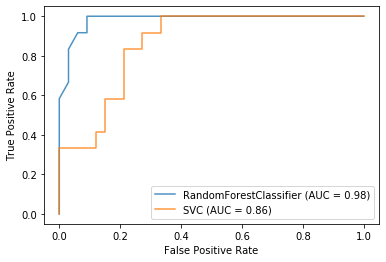

In [3]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train,y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc,X_test,y_test,ax=ax,alpha=0.8)
svc_disp.plot(ax=ax,alpha=0.8)
plt.show()